In [2]:
%pip install osmnx
%pip install networkx
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


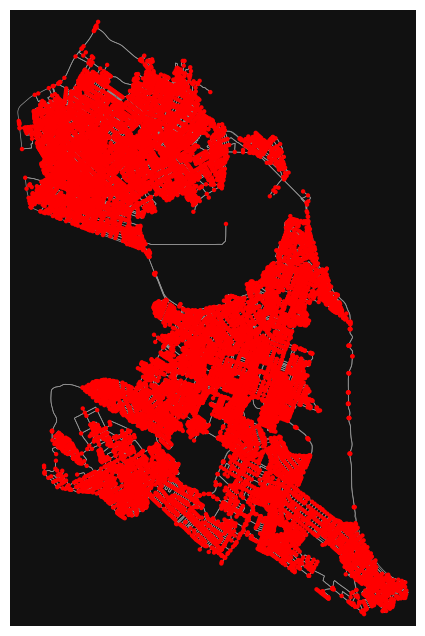

In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Obter a rede de ruas de Natal-RN
place_name = "Natal, Rio Grande do Norte, Brazil"
G = ox.graph_from_place(place_name, network_type='drive')

# Mostrar o grafo
fig, ax = ox.plot_graph(G, node_size=10, node_color='red', edge_linewidth=0.5)


Por padrão, a função graph_from_place da biblioteca OSMnx gera um MultiDiGraph, que é um grafo dirigido que permite múltiplas arestas entre os mesmos nós. Isso ocorre porque, em redes de ruas, é comum encontrar múltiplas arestas entre dois pontos, representando, por exemplo, diferentes faixas, sentidos de direção (ida e volta) ou rotas alternativas entre dois nós.

1. Cycles (Ciclos)

Para identificar a quantidade de ciclos independentes na rede, usamos networkx.cycle_basis para contar os ciclos.

'nx.cycle_basis' não é implementado para grafos do tipo Multigraph, e o OSMnx por padrão cria grafos desse tipo, então primeiramente o grafo foi convertido para um simples:

In [4]:
# Converter o grafo para um grafo simples
G_simple = nx.Graph(G)

# Encontrar ciclos independentes
cycles = nx.cycle_basis(G_simple)
num_cycles = len(cycles)
print("Número de ciclos independentes na rede:", num_cycles)

Número de ciclos independentes na rede: 9414


- Pergunta: Quantos ciclos independentes existem na rede de Natal?
- Resposta: Esta métrica indica o número de ciclos independentes, que mostra a quantidade de loops na rede e como estão distribuídos.

2. Average Shortest Path Length (Comprimento Médio do Caminho Mais Curto)

O comprimento médio do caminho mais curto indica o quanto as rotas são otimizadas dentro da cidade:

In [9]:
# Converter o grafo para não direcionado
G_undirected = G.to_undirected()

# Identificar a maior componente conectada
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_lcc = G_undirected.subgraph(largest_cc).copy()  # Subgrafo da maior componente conectada

# Calcular o comprimento médio do caminho mais curto na maior componente conectada
avg_shortest_path_length = nx.average_shortest_path_length(G_lcc)
print("Comprimento médio do caminho mais curto (na maior componente conectada):", avg_shortest_path_length)

Comprimento médio do caminho mais curto (na maior componente conectada): 79.5658127079651


- Pergunta: Qual é o comprimento médio do caminho mais curto?
- Resposta: Esta métrica reflete a facilidade ou dificuldade de navegação pela cidade, com valores menores indicando uma rede mais conectada e acessível.

3. Diameter of Network (Diâmetro da Rede)

O diâmetro da rede é a maior distância mínima entre quaisquer dois nós no grafo:

In [12]:
# Converter o grafo para não direcionado
G_undirected = G.to_undirected()

# Identificar a maior componente conectada
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_lcc = G_undirected.subgraph(largest_cc).copy()  # Subgrafo da maior componente conectada

# Calcular o diâmetro da maior componente conectada
diameter = nx.diameter(G_lcc)
print("Diâmetro da rede (na maior componente conectada):", diameter)

Diâmetro da rede (na maior componente conectada): 209


- Pergunta: Qual é o maior caminho dentro da rede?
- Resposta: O diâmetro mostra a extensão máxima da rede, refletindo o maior percurso possível na cidade sem desconexões.

4. Shortest Path Length (Caminho Mais Curto)

Escolhemos dois pontos aleatórios para verificar a distância entre eles:

In [5]:
# Encontrar caminho mais curto entre dois pontos
nodes = list(G.nodes)
shortest_path_length = nx.shortest_path_length(G, source=nodes[0], target=nodes[-1])
print("Comprimento do caminho mais curto entre dois pontos:", shortest_path_length)

Comprimento do caminho mais curto entre dois pontos: 57


- Pergunta: Qual é o menor caminho entre dois pontos principais?
- Resposta: Isso representa a distância mais curta entre os pontos selecionados, ajudando a entender a conectividade prática.

5. Connected Components (Componentes Conectados)

O número de componentes conectados indica quantas sub-redes existem na cidade:

In [8]:
# Converter o grafo para não direcionado
G_undirected = G.to_undirected()

# Calcular o número de componentes conectados no grafo não direcionado
num_connected_components = nx.number_connected_components(G_undirected)
print("Número de componentes conectados:", num_connected_components)

Número de componentes conectados: 1


- Pergunta: Quantos componentes conectados existem na rede?
- Resposta: Isso mostra quantas partes independentes existem na rede e se há áreas desconectadas.

6. Giant Connected Component (Maior Componente Conectado)

O maior componente conectado mostra a parte mais ampla e contínua da rede:

In [ ]:
# Encontrar o maior componente conectado
giant_cc = max(nx.connected_components(G), key=len)
print("Número de nós no maior componente conectado:", len(giant_cc))

- Pergunta: Qual é a característica do maior componente conectado?
- Resposta: Esta métrica ajuda a entender a parte mais interligada da rede, indicando as áreas mais acessíveis.

7. Clustering Coefficient (Coeficiente de Agrupamento)

Essa métrica mostra a probabilidade de que os vizinhos de um nó também estejam conectados entre si:

In [ ]:
# Calcular o coeficiente de agrupamento médio
clustering_coefficient = nx.average_clustering(G)
print("Coeficiente de agrupamento médio:", clustering_coefficient)

- Pergunta: Qual o grau de interconexão entre as ruas da cidade?
- Resposta: Um coeficiente de agrupamento alto indica maior conectividade entre as ruas, o que facilita a mobilidade.